# Estimation with Monte Carlo Methods

By Tigist Wondimneh

wondimnehtigist@gmail.com

This notebook demonstrates Monte Carlo integration techniques for:
1. Estimating pi.
2. 1D and 2D Numerical Integration.
3. Error Analysis.

We explore different tasks using reusable functions, including visualization of convergence, error analysis, and random sampling points.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad
from mpl_toolkits.mplot3d import Axes3D


## Define Predefined Functions
These functions will be used for 1D and 2D integration tasks.


In [ ]:
# Predefined 1D Functions
predefined_functions = {
    "e^(-x^2)": lambda x: np.exp(-x**2),
    "sin(x)": lambda x: np.sin(x),
    "x^2": lambda x: x**2,
    "cos(x)": lambda x: np.cos(x)
}

# Predefined 2D Functions
predefined_2D_functions = {
    "e^{-(x^2 + y^2)}": lambda x, y: np.exp(-(x**2 + y**2)),
    "sin(x) * cos(y)": lambda x, y: np.sin(x) * np.cos(y),
    "x^2 + y^2": lambda x, y: x**2 + y**2,
    "sin(x + y)": lambda x, y: np.sin(x + y)
}


## Task 1: Estimating pi Using Monte Carlo Methods
We approximate pi by randomly sampling points in a square enclosing a unit circle and calculating the ratio of points inside the circle.


Estimated π: 3.13608
Actual π: 3.141592653589793


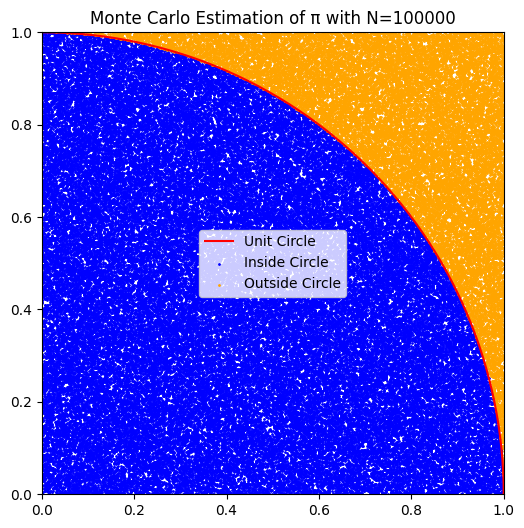

In [ ]:
def estimate_pi(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    inside_circle = (x**2 + y**2) <= 1
    pi_estimate = 4 * np.sum(inside_circle) / N
    return pi_estimate, x, y, inside_circle

def plot_circle_and_points(x, y, inside_circle, N):
    fig, ax = plt.subplots(figsize=(6, 6))
    theta = np.linspace(0, 2 * np.pi, 1000)
    ax.plot(np.cos(theta), np.sin(theta), label="Unit Circle", color="red")
    ax.scatter(x[inside_circle], y[inside_circle], color="blue", s=1, label="Inside Circle")
    ax.scatter(x[~inside_circle], y[~inside_circle], color="orange", s=1, label="Outside Circle")
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend()
    plt.title(f"Monte Carlo Estimation of π with N={N}")
    plt.show()

# Example Usage
N = 100000
pi_estimate, x, y, inside_circle = estimate_pi(N)
print(f"Estimated π: {pi_estimate}")
print(f"Actual π: {np.pi}")
plot_circle_and_points(x, y, inside_circle, N)


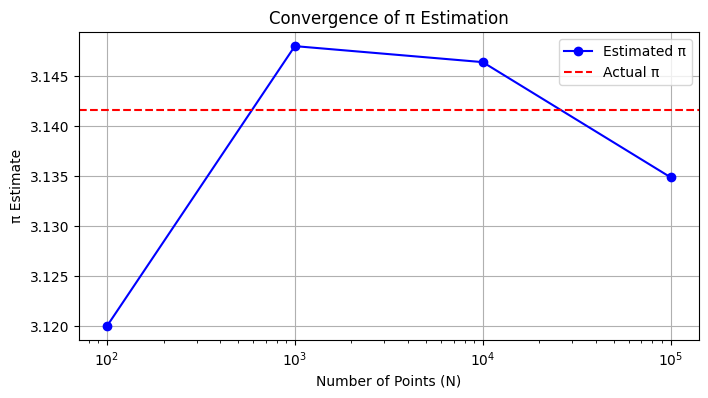

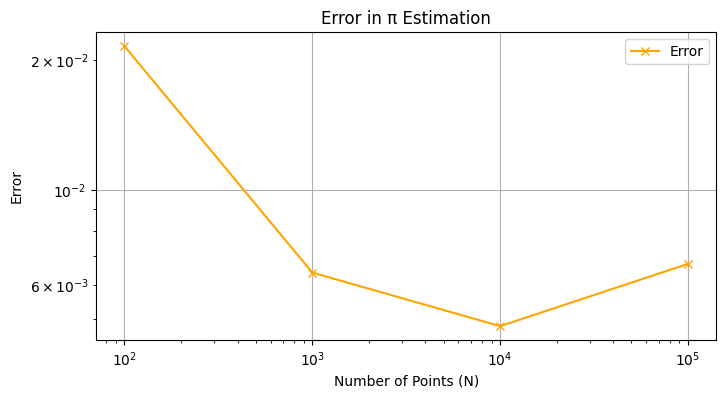

In [ ]:
def plot_pi_error(N_values):
    pi_actual = np.pi
    pi_estimates = []
    errors = []

    for N in N_values:
        pi_estimate = estimate_pi(N)[0]
        pi_estimates.append(pi_estimate)
        errors.append(abs(pi_estimate - pi_actual))

    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(N_values, pi_estimates, marker='o', label="Estimated π", color='blue')
    ax.axhline(y=pi_actual, color='red', linestyle='--', label="Actual π")
    ax.set_xscale('log')
    ax.set_xlabel("Number of Points (N)")
    ax.set_ylabel("π Estimate")
    ax.set_title("Convergence of π Estimation")
    ax.legend()
    ax.grid()
    plt.show()

    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(N_values, errors, marker='x', label="Error", color='orange')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Number of Points (N)")
    ax.set_ylabel("Error")
    ax.set_title("Error in π Estimation")
    ax.legend()
    ax.grid()
    plt.show()

N_values = [100, 1000, 10000, 100000]
plot_pi_error(N_values)


## Task 2: 1D Numerical Integration
Monte Carlo integration approximates the definite integral of a 1D function over a given range.


Estimated Integral: 0.7470522464657732


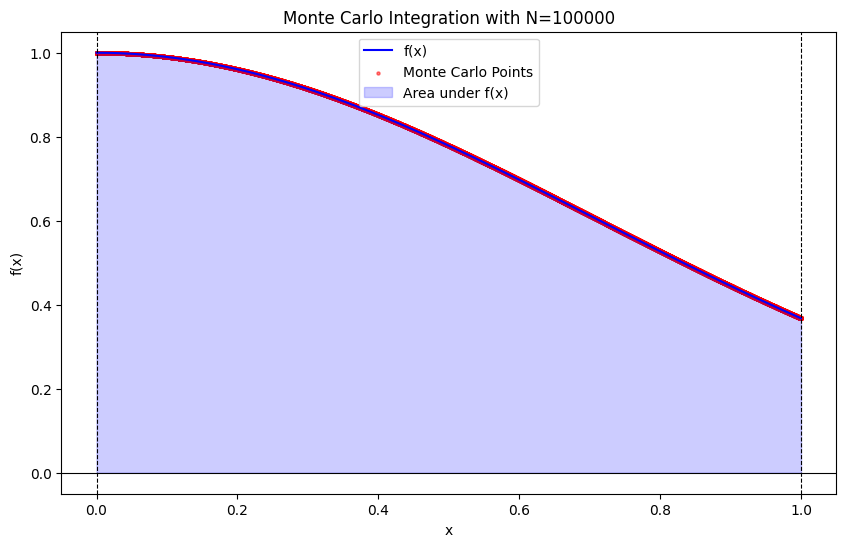

In [ ]:
def monte_carlo_integration_1(f, a, b, N):
    x = np.random.uniform(a, b, N)
    integral = (b - a) * np.mean(f(x))
    return integral, x, f(x)

def visualize_1D_integration(x, y, a, b, f, N):
    x_curve = np.linspace(a, b, 500)
    y_curve = f(x_curve)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_curve, y_curve, label="f(x)", color="blue")
    ax.scatter(x, y, color="red", s=5, alpha=0.5, label="Monte Carlo Points")
    ax.fill_between(x_curve, 0, y_curve, color="blue", alpha=0.2, label="Area under f(x)")
    ax.axhline(0, color="black", linewidth=0.8)
    ax.axvline(a, color="black", linestyle="--", linewidth=0.8)
    ax.axvline(b, color="black", linestyle="--", linewidth=0.8)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    plt.title(f"Monte Carlo Integration with N={N}")
    ax.legend()
    plt.show()

f = predefined_functions["e^(-x^2)"]
a, b, N = 0, 1, 100000
integral, x, y = monte_carlo_integration_1(f, a, b, N)
print(f"Estimated Integral: {integral}")
visualize_1D_integration(x, y, a, b, f, N)


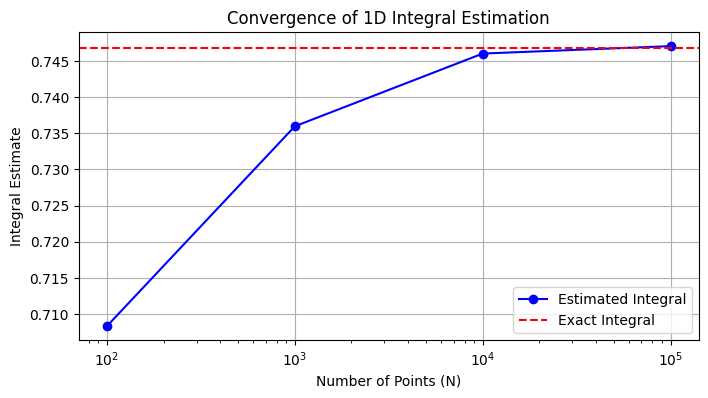

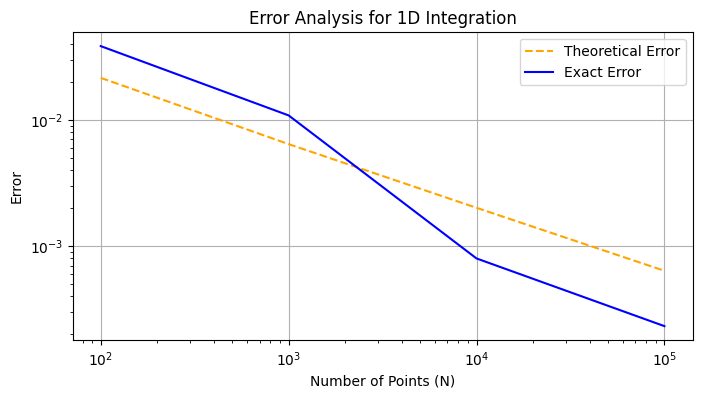

In [ ]:
def plot_1D_error(f, a, b, N_values):
    exact_value, _ = quad(f, a, b)
    estimates = []
    theoretical_errors = []
    exact_errors = []

    for N in N_values:
        integral, error_bound = monte_carlo_error_analysis_1D(f, a, b, N)
        estimates.append(integral)
        theoretical_errors.append(error_bound)
        exact_errors.append(abs(integral - exact_value))

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(N_values, estimates, marker='o', label="Estimated Integral", color='blue')
    ax.axhline(y=exact_value, color='red', linestyle='--', label="Exact Integral")
    ax.set_xscale('log')
    ax.set_xlabel("Number of Points (N)")
    ax.set_ylabel("Integral Estimate")
    ax.set_title("Convergence of 1D Integral Estimation")
    ax.legend()
    ax.grid()
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(N_values, theoretical_errors, label="Theoretical Error", linestyle='--', color='orange')
    ax.plot(N_values, exact_errors, label="Exact Error", linestyle='-', color='blue')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Number of Points (N)")
    ax.set_ylabel("Error")
    ax.set_title("Error Analysis for 1D Integration")
    ax.legend()
    ax.grid()
    plt.show()

f = predefined_functions["e^(-x^2)"]
a, b = 0, 1
N_values = [100, 1000, 10000, 100000]
plot_1D_error(f, a, b, N_values)


## Task 3: 2D Numerical Integration
We extend the Monte Carlo integration approach to estimate the integral of a 2D function over a rectangular domain.


Estimated 2D Integral: 0.5524976822223195


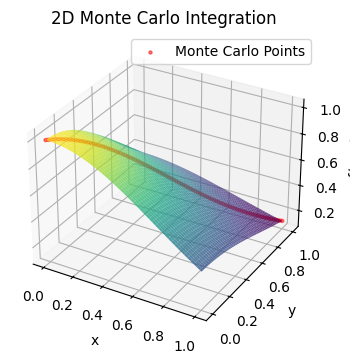

Actual 2D Integral: 0.5524976822223195


In [ ]:
def monte_carlo_integration_2(f, a, b, N):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(a, b, N)
    integral = (b - a) * (b - a) * np.mean(f(x, y))
    return integral

def visualize_2D_integration(f, a, b, N):
    x = np.linspace(a, b, 100)
    y = np.linspace(a,b, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.scatter(x, y, f(x,y), color='red', s=5, alpha=0.5, label="Monte Carlo Points")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Monte Carlo Integration - 2D')
    ax.legend()
    ax.grid()
    plt.title("2D Monte Carlo Integration")
    plt.show()

# Example Usage
f_2D = predefined_2D_functions["e^{-(x^2 + y^2)}"]
a, b, N = 0, 1, 1000
integral = monte_carlo_integration_2(f_2D, a, b, N)

print(f"Estimated 2D Integral: {integral}")
visualize_2D_integration(f_2D, a, b, N)
print(f"Actual 2D Integral: {integral}")
exact_value, _ = dblquad(f_2D, a, b, lambda x: a, lambda x: b)


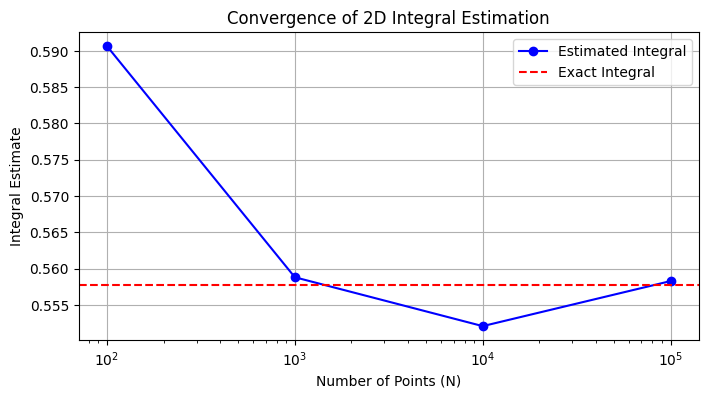

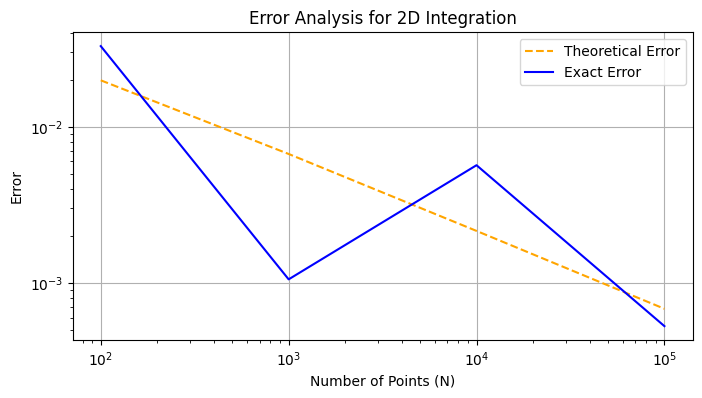

In [ ]:
def plot_2D_error(f, a, b, N_values):
    exact_value, _ = dblquad(f, a, b, lambda x: a, lambda x: b)
    estimates = []
    theoretical_errors = []
    exact_errors = []

    for N in N_values:
        x_samples = np.random.uniform(a, b, N)
        y_samples = np.random.uniform(a, b, N)
        f_values = f(x_samples, y_samples)
        area = (b - a)**2
        integral = area * np.mean(f_values)
        sigma = np.std(f_values)
        error_bound = area * sigma / np.sqrt(N)
        estimates.append(integral)
        theoretical_errors.append(error_bound)
        exact_errors.append(abs(integral - exact_value))

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(N_values, estimates, marker='o', label="Estimated Integral", color='blue')
    ax.axhline(y=exact_value, color='red', linestyle='--', label="Exact Integral")
    ax.set_xscale('log')
    ax.set_xlabel("Number of Points (N)")
    ax.set_ylabel("Integral Estimate")
    ax.set_title("Convergence of 2D Integral Estimation")
    ax.legend()
    ax.grid()
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(N_values, theoretical_errors, label="Theoretical Error", linestyle='--', color='orange')
    ax.plot(N_values, exact_errors, label="Exact Error", linestyle='-', color='blue')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Number of Points (N)")
    ax.set_ylabel("Error")
    ax.set_title("Error Analysis for 2D Integration")
    ax.legend()
    ax.grid()
    plt.show()

f_2D = predefined_2D_functions["e^{-(x^2 + y^2)}"]
a, b = 0, 1
N_values = [100, 1000, 10000, 100000]
plot_2D_error(f_2D, a, b, N_values)


## Task 4: Error Analysis
Monte Carlo methods converge with an error rate proportional to \( 1 / \sqrt{N} \). This section includes error analysis for 1D and 2D integrations.


In [ ]:
def monte_carlo_error_analysis_1D(f, a, b, N):
    x = np.random.uniform(a, b, N)
    f_values = f(x)
    integral = (b - a) * np.mean(f_values)
    sigma = np.std(f_values)
    error_bound = (b - a) * sigma / np.sqrt(N)
    return integral, error_bound

f = predefined_functions["e^(-x^2)"]
a, b, N = 0, 1, 1000
integral, error_bound = monte_carlo_error_analysis_1D(f, a, b, N)
print(f"Estimated Integral: {integral}")
print(f"Theoretical Error Bound: {error_bound}")


Estimated Integral: 0.7410969069939809
Theoretical Error Bound: 0.006486094915952545


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad

def monte_carlo_error_analysis_multiple_N_1D(f, a, b, N_values):
    exact_value, _ = quad(f, a, b)
    results = {"N": [], "Estimated": [], "Theoretical Error": [], "Exact Error": []}

    for N in N_values:
        x_samples = np.random.uniform(a, b, N)
        f_values = f(x_samples)
        integral = (b - a) * np.mean(f_values)

        sigma = np.std(f_values)
        theoretical_error = (b - a) * sigma / np.sqrt(N)

        exact_error = abs(integral - exact_value)

        results["N"].append(N)
        results["Estimated"].append(integral)
        results["Theoretical Error"].append(theoretical_error)
        results["Exact Error"].append(exact_error)

    return results


In [ ]:
def plot_error_analysis(results):

    N_values = results["N"]
    theoretical_errors = results["Theoretical Error"]
    exact_errors = results["Exact Error"]

    plt.figure(figsize=(8,4))
    plt.plot(N_values, theoretical_errors, label="Theoretical Error", linestyle="--", color="orange")
    plt.plot(N_values, exact_errors, label="Exact Error", linestyle="-", color="blue")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Number of Points (N)")
    plt.ylabel("Error")
    plt.title("Error Analysis for Monte Carlo Integration (1D)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


N = 100: Estimated = 0.751733, Theoretical Error = 0.020668, Exact Error = 0.004908
N = 1000: Estimated = 0.737544, Theoretical Error = 0.006395, Exact Error = 0.009280
N = 10000: Estimated = 0.749856, Theoretical Error = 0.001995, Exact Error = 0.003032
N = 100000: Estimated = 0.746294, Theoretical Error = 0.000636, Exact Error = 0.000530


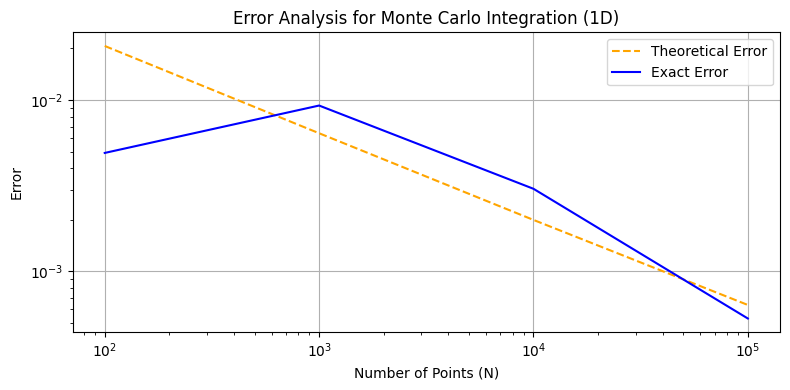

In [ ]:
f = predefined_functions["e^(-x^2)"]
a, b, = 0, 1
N_values = [100, 1000, 10000, 100000]

results = monte_carlo_error_analysis_multiple_N_1D(f, a, b, N_values)
for i, N in enumerate(results["N"]):
    print(f"N = {N}: Estimated = {results['Estimated'][i]:.6f}, "
          f"Theoretical Error = {results['Theoretical Error'][i]:.6f}, "
          f"Exact Error = {results['Exact Error'][i]:.6f}")
plot_error_analysis(results)
